In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\DE_CO2.csv")

In [3]:
df.isna().sum()

ID                            0
Country                       0
VFN                       24704
Mp                       204336
Mh                            0
Man                           0
MMS                     2765152
Tan                       25097
T                          1092
Va                        18021
Ve                        23390
Mk                          311
Cn                          341
Ct                            0
Cr                            0
r                             0
m (kg)                        4
Mt                        23075
Enedc (g/km)            2765152
Ewltp (g/km)              10234
W (mm)                  2765152
At1 (mm)                2765152
At2 (mm)                2765152
Ft                            0
Fm                            0
ec (cm3)                 523870
ep (KW)                   17471
z (Wh/km)               2076011
IT                      1101601
Ernedc (g/km)           2765152
Erwltp (g/km)           1101617
De      

In [4]:
col_to_del = ['MMS', 'Enedc (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ernedc (g/km)', 'De', 'Vf']

In [5]:
# colonnes à supprimer car pas assez remplies (à valider, on peut peut être aussi inclure IT et Erwltp (g/km))
col_to_del.append('RLFI')

In [6]:
# colonnes à supprimer car doublons d'information
col_to_del.extend(('Mp', 'Mh', 'Man', 'Cr', 'm (kg)', 'Fm'))

In [7]:
# colonnes à supprimer car non pertinentes (infos administratives ou relatives au jeu de données en lui-même)
col_to_del.extend(('ID', 'Status', 'r', 'year', 'Tan', 'Va', 'Ve', 'Ct', 'Cr'))

In [8]:
# suppression des lignes concernant les véhicules électriques ainsi que des colonnes concernant ces véhicules uniquement
df = df[df['Ft'] != 'electric']
col_to_del.append('Electric range (km)')

In [9]:
# suppresion de colonnes sélectionnées
df = df.drop(col_to_del, axis=1)

In [10]:
# suppresion des doublons
df = df.drop_duplicates()

In [11]:
df.to_csv("C:\\Users\\Pc\\Downloads\\ReducedDECO2.csv", index=False)

In [12]:
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\ReducedDECO2.csv")

In [13]:
df.head(5)

,Country,VFN,T,Mk,Cn,Mt,Ewltp (g/km),Ft,ec (cm3),ep (KW),z (Wh/km),IT,Erwltp (g/km),Date of registration,Fuel consumption,ech
0,DE,IP-2021_536K7F-YV1-1,X,VOLVO,XC40,1822.0,153.0,petrol,1969.0,120.0,NaN,NaN,NaN,2023-11-06,6.7,Euro 6 AP
1,DE,IP-03_MP_0298-ZFA-1,MP,JEEP,COMPASS,1696.0,133.0,petrol,1469.0,96.0,NaN,e3 37 32,2.20,2023-05-25,5.8,NaN
2,DE,IP-MQB27ZZ_A1_0529-WAU-1,GB,AUDI,A1 SPORTBACK,1294.0,129.0,petrol,999.0,70.0,NaN,e13 29,1.13,2023-03-20,5.7,NaN
3,DE,IP-MQB27ZZ_A0_1005-TMB-1,PJ,SKODA,FABIA,1232.0,117.0,petrol,999.0,59.0,NaN,e8 29 37,1.94,2023-08-03,5.2,NaN
4,DE,IP-0001010-WBA-1,U1X,BMW,X1 XDRIVE 25E,2066.0,17.0,petrol/electric,1499.0,100.0,151.0,NaN,NaN,2023-08-09,0.7,NaN


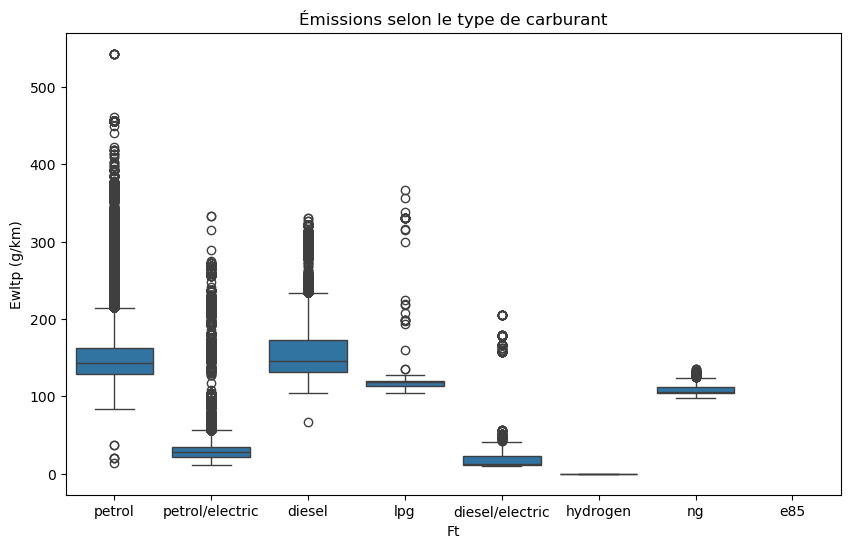

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données
df = pd.read_csv("C:\\Users\\Pc\\Downloads\\ReducedDECO2.csv")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Ft', y='Ewltp (g/km)')
plt.title('Émissions selon le type de carburant')
plt.show()

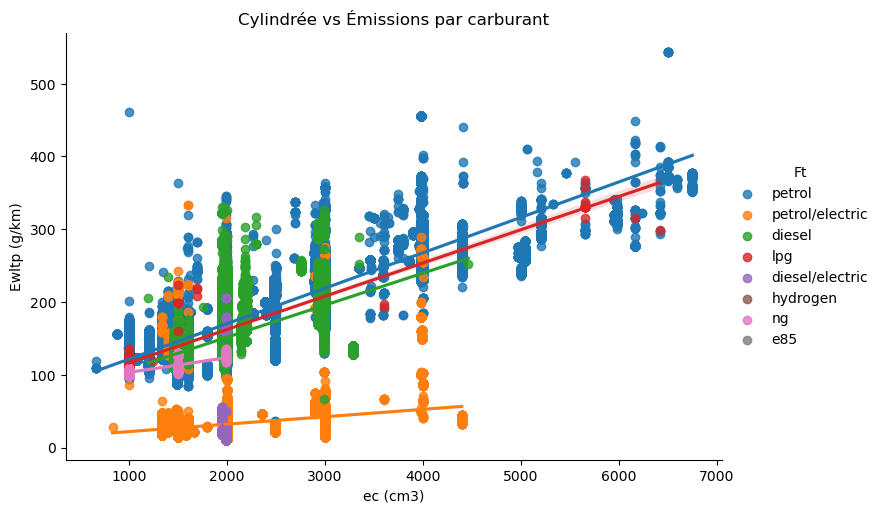

In [15]:
sns.lmplot(data=df, x='ec (cm3)', y='Ewltp (g/km)', hue='Ft', aspect=1.5)
plt.title('Cylindrée vs Émissions par carburant')
plt.show()

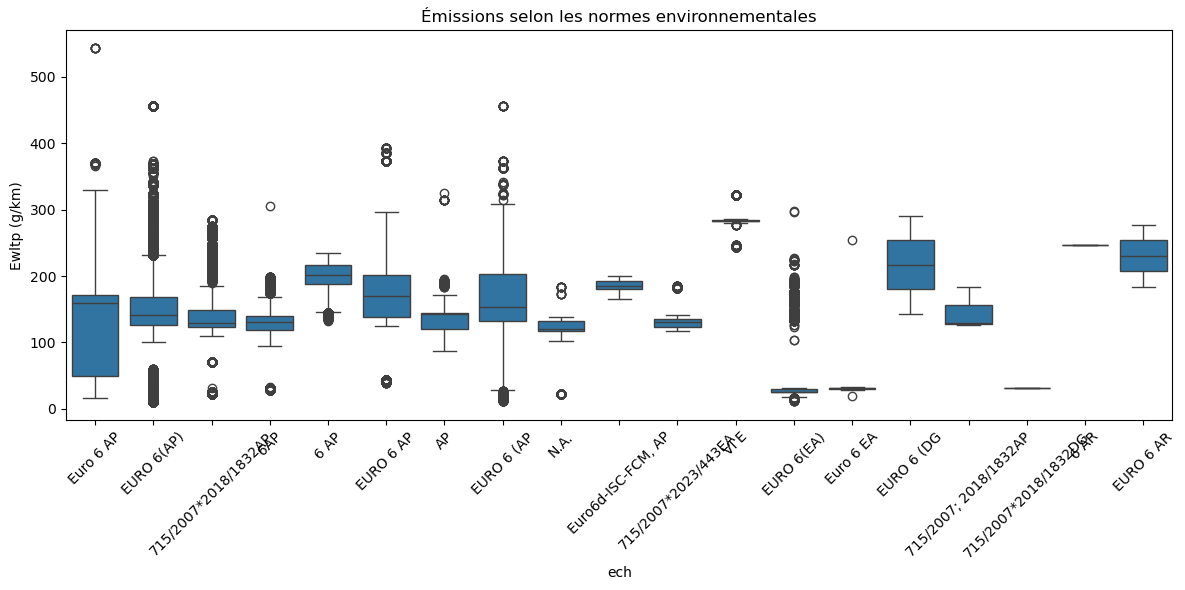

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ech', y='Ewltp (g/km)')
plt.xticks(rotation=45)
plt.title('Émissions selon les normes environnementales')
plt.tight_layout()
plt.show()

C:\Users\Pc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


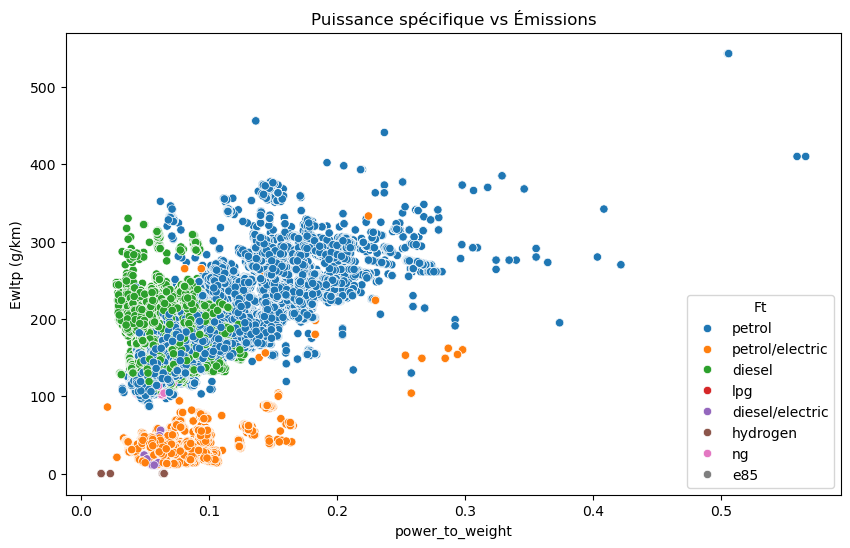

In [17]:
# Calcul de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='power_to_weight', y='Ewltp (g/km)', hue='Ft')
plt.title('Puissance spécifique vs Émissions')
plt.show()

In [18]:
top5_polluants = df.sort_values(by='Ewltp (g/km)', ascending=False).head(5)
top5_sobres = df.sort_values(by='Ewltp (g/km)', ascending=True).head(5)

print("Top 5 véhicules les plus émetteurs :")
print(top5_polluants[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])
print("\nTop 5 véhicules les plus sobres :")
print(top5_sobres[['Mk', 'Cn', 'Ewltp (g/km)', 'Ft']])

Top 5 véhicules les plus émetteurs :
                   Mk        Cn  Ewltp (g/km)      Ft
500528   ASTON MARTIN  VALKYRIE         543.0  petrol
1309246  ASTON MARTIN  VALKYRIE         543.0  petrol
410628   ASTON MARTIN  VALKYRIE         543.0  petrol
723436   ASTON MARTIN  VALKYRIE         543.0  petrol
1209633  ASTON MARTIN  VALKYRIE         543.0  petrol

Top 5 véhicules les plus sobres :
             Mk            Cn  Ewltp (g/km)        Ft
543552   TOYOTA  TOYOTA MIRAI           0.0  hydrogen
742710  HYUNDAI          NEXO           0.0  hydrogen
116675  HYUNDAI          NEXO           0.0  hydrogen
975312  HYUNDAI          NEXO           0.0  hydrogen
733497   TOYOTA  TOYOTA MIRAI           0.0  hydrogen


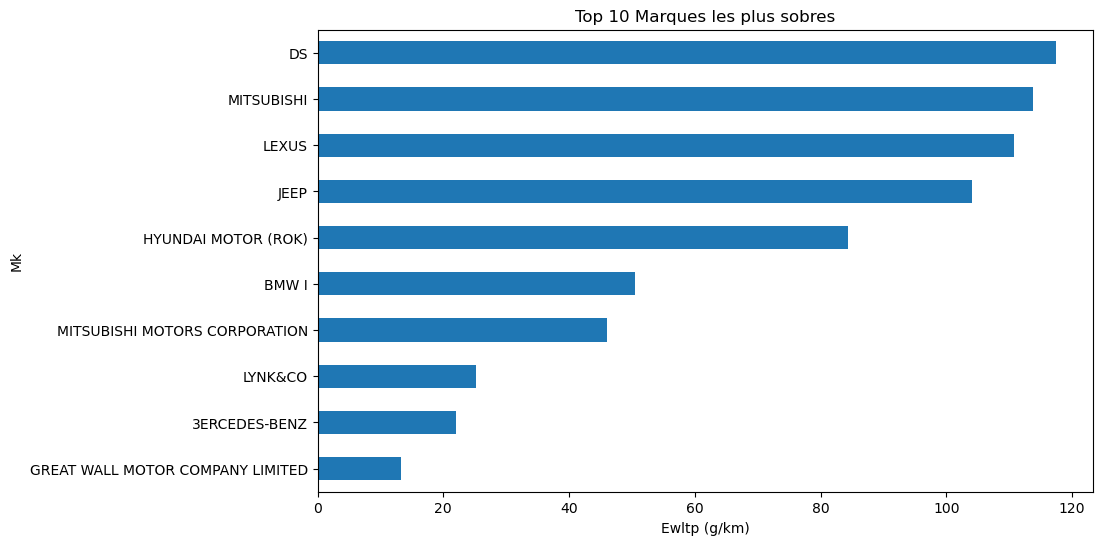

In [19]:
mean_emissions_by_brand = df.groupby('Mk')['Ewltp (g/km)'].mean().sort_values()
mean_emissions_by_brand.head(10).plot(kind='barh', figsize=(10, 6), title='Top 10 Marques les plus sobres')
plt.xlabel('Ewltp (g/km)')
plt.show()

C:\Users\Pc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


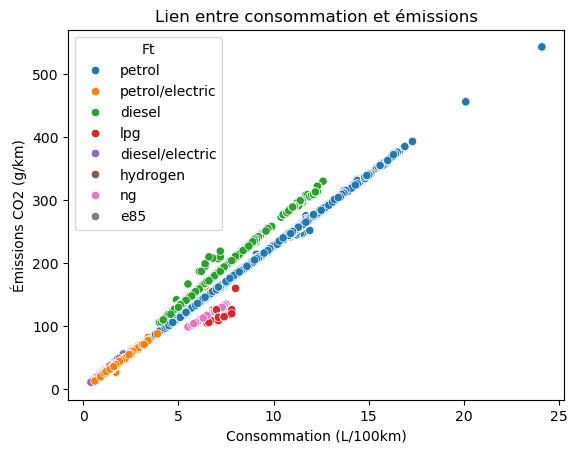

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip()

sns.scatterplot(data=df, 
                x='Fuel consumption', 
                y='Ewltp (g/km)', 
                hue='Ft')

plt.title('Lien entre consommation et émissions')
plt.xlabel('Consommation (L/100km)')
plt.ylabel('Émissions CO2 (g/km)')
plt.show()

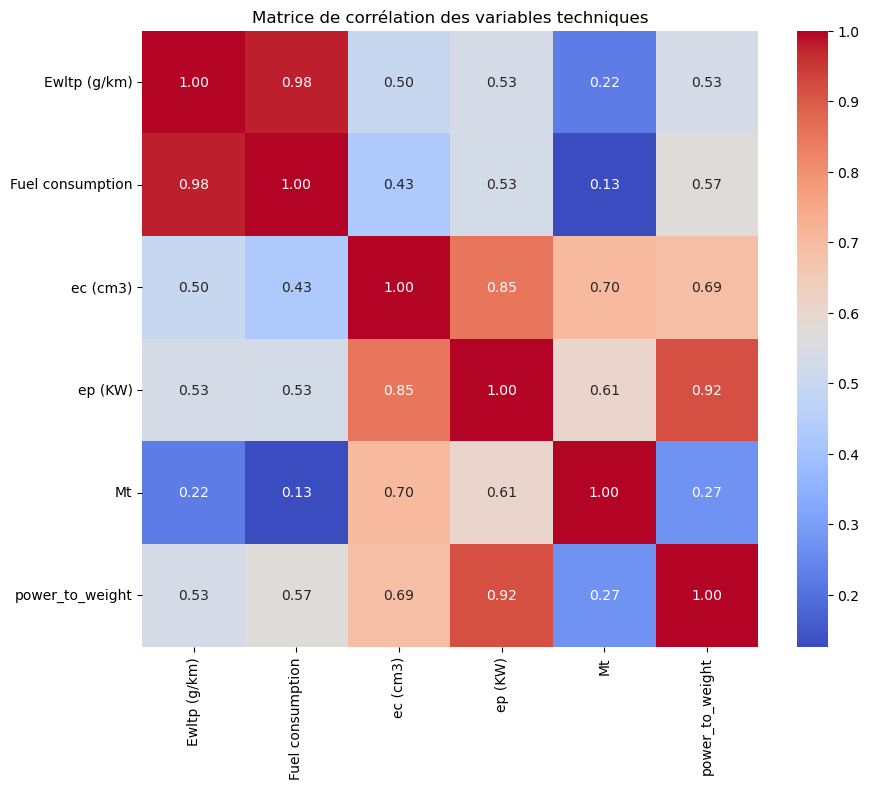

In [21]:
# Nettoyage éventuel des noms de colonnes
df.columns = df.columns.str.strip()


# Ajout de la puissance spécifique
df['power_to_weight'] = df['ep (KW)'] / df['Mt']

# Sélection des colonnes à corréler
colonnes_corr = ['Ewltp (g/km)', 'Fuel consumption', 'ec (cm3)', 'ep (KW)', 'Mt', 'power_to_weight']
df_corr = df[colonnes_corr].copy()

# Calcul de la matrice de corrélation
correlation_matrix = df_corr.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Matrice de corrélation des variables techniques")
plt.show()